In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Setup hyperparameters:
density = 533           # https://sci.esa.int/web/rosetta/-/14615-comet-67p
r_T = 5000              # Target altitude
t_end = 20*3600.0       # Final time
t_0 = 0                 # Starting time
dt = 800.0             # Number of steps along orbit 

# Bounds for initial domain: [r_x,r_y,r_z,v_x,v_y,v_z]
lb, ub = [-6000,-6000,-6000,0,0,0],[6000,6000,6000,2.5,2.5,2.5]

# Optimization
pop_size = 10
num_gen = 32

In [25]:
import math
import pygmo as pg
import matplotlib.pyplot as plt
import udp_basic

# Setup class
udp = udp_basic.udp_obj(density, r_T, t_end, t_0, dt, lb, ub)

# Define problem
prob = pg.problem(udp)
print(prob)

# Setup algorithm
algo = pg.algorithm(pg.sade(gen = num_gen))
pop = pg.population(prob = prob, size = pop_size)

Physical dimension along x (UN-normalized):  5002.5703125 Km
Problem name: <class 'udp_basic.udp_obj'>
	C++ class name: pybind11::object

	Global dimension:			6
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-6000, -6000, -6000, 0, 0, ... ]
	Upper bounds: [6000, 6000, 6000, 2.5, 2.5, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [26]:
# Run optimization
algo.set_verbosity(1)
pop = algo.evolve(pop)


   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             10        37270.7       0.119044       0.952964        12596.9        78807.3
      2             20        37270.7       0.119044       0.952964        12596.9        78807.3
      3             30        22656.5       0.970416       0.643414        15206.9        93206.6
      4             40        1536.79       0.463903       0.776699        11550.6         114326
      5             50        1536.79       0.463903       0.776699        13271.8        94850.5
      6             60        1422.84       0.119044       0.952964        13738.1        77743.7
      7             70        1422.84       0.119044       0.952964        13738.1        77743.7
      8             80        1422.84       0.119044       0.952964        12779.8        76945.9
      9             90        1422.84       0.119044       0.952964        14845.2        44705.7
     10            

In [27]:
# Logs for output
print("Champion fitness value: ", pop.champion_f) 
print("Champion chromosome: ", pop.champion_x) 

# Retrieving champion chromosome
x = pop.champion_x

# Compute optimized trajectory
fit_val, r_store, v_store, a_store = udp.compute_trajectory(x)

# Plot optimized trajectory
udp.plot_trajectory(r_store)

Champion fitness value:  [448.69063119]
Champion chromosome:  [ 1.74554250e+03 -5.42689322e+01 -3.83428080e+03  2.54172280e-01
  5.79970649e-01  1.10994718e-01]


BokehModel(combine_events=True, render_bundle={'docs_json': {'cdcd57b7-2c46-4e54-b5a5-f3bed84b8e34': {'defs': …

In [28]:
print(r_store[:,0])
print(v_store[:,0])
print(a_store[:,0])

[ 1745.54250071   -54.26893224 -3834.28079633]
[0.25417228 0.57997065 0.11099472]
[-3.48536252e-05  1.47028179e-06  8.33417456e-05]


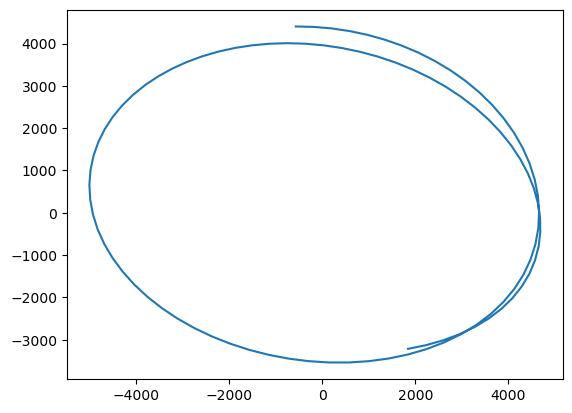

In [18]:
plt.plot(r_store[1],r_store[2])

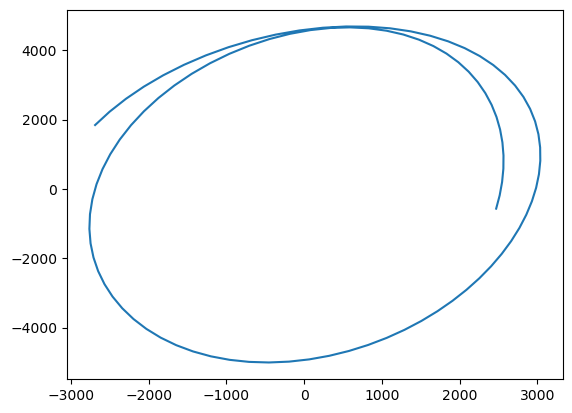

In [19]:
plt.plot(r_store[0],r_store[1])

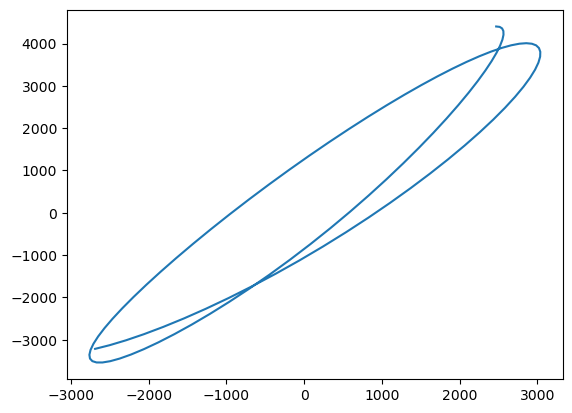

In [20]:
plt.plot(r_store[0],r_store[2])